In [1]:
import os
import time
import numpy as np 
import torch
import torch.nn as nn
import torchvision
import torchvision.models as models
from torchvision.utils import save_image
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import Dataset, DataLoader
import cv2

!rm -rf dataset/dataset_updated/training_set

In [2]:
from google.colab import files
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arpitpipara","key":"fc1d1f4e3c94dae3a757f0293824578f"}'}

In [3]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [4]:
!kaggle datasets download -d thedownhill/art-images-drawings-painting-sculpture-engraving

 98% 570M/583M [00:09<00:00, 60.6MB/s]
100% 583M/583M [00:09<00:00, 62.2MB/s]


In [5]:
!ls

art-images-drawings-painting-sculpture-engraving.zip  kaggle.json  sample_data


In [6]:
!unzip -q art-images-drawings-painting-sculpture-engraving.zip

In [7]:
!rm dataset/dataset_updated/training_set/painting/'2050 20.26.31.jpg'

In [8]:
%cd dataset/dataset_updated/training_set/painting/

/content/dataset/dataset_updated/training_set/painting


In [ ]:
!ls	

In [9]:
TRAIN_PATH = "/content/dataset/dataset_updated/training_set/painting"
#train_ids = next(os.walk(TRAIN_PATH))[2]
val = os.listdir(TRAIN_PATH)
#print(val)


In [10]:
print([f for f in os.listdir(TRAIN_PATH)])

['1030.jpg', '0830.jpg', '1266.jpg', '1584.jpg', '1254.jpg', '0463.jpg', '1149.jpg', '1996 20.26.31.jpg', '1797.jpg', '1314.jpg', '2169.jpg', '1469.jpg', '0928.jpg', '1361.jpg', '1537.jpg', '0407.jpg', '0092.jpg', '2022.jpg', '2048.jpg', '0236.jpg', '0255.jpg', '1945.jpg', '0154.jpg', '2101.jpg', '1379.jpg', '0259.jpg', '1050.jpg', '1039.jpg', '0487.jpg', '0393.jpg', '2102.jpg', '1940.jpg', '1899.jpg', '0850.jpg', '2110.jpg', '2020.jpg', '0325.jpg', '1296.jpg', '0151.jpg', '1604.jpg', '1825.jpg', '0714.jpg', '1619.jpg', '0048.jpg', '2051.jpg', '1529.jpg', '1701.jpg', '2181.jpg', '1179.jpg', '0222.jpg', '1384.jpg', '1918.jpg', '0210.jpg', '0319.jpg', '0256.jpg', '0818.jpg', '0416.jpg', '0299.jpg', '0459.jpg', '0848.jpg', '2133.jpg', '0947.jpg', '0043.jpg', '1205.jpg', '0051.jpg', '0667.jpg', '2057.jpg', '0465.jpg', '1816.jpg', '1440.jpg', '0646.jpg', '1006.jpg', '0493.jpg', '0220.jpg', '1615.jpg', '1957.jpg', '0723.jpg', '1017.jpg', '1612.jpg', '0701.jpg', '1364.jpg', '1411.jpg', '2324.

In [11]:
root_dir = TRAIN_PATH
files = [f for f in os.listdir(root_dir)]
l = []
for i in range(len(files)):
  rgb = cv2.imread(os.path.join(root_dir,files[i]))
  if rgb is None:
    l.append(files[i])


In [12]:
print((l))

['1050.jpg', '0850.jpg', '0325.jpg', '1825.jpg', '2000.jpg', '1000.jpg', '0475.jpg', '2025.jpg', '1725.jpg', '1025.jpg', '0400.jpg', '1475.jpg', '2125.jpg', '1075.jpg', '1350.jpg', '0625.jpg', '0525.jpg', '0175.jpg', '1575.jpg', '1325.jpg', '1375.jpg', '0375.jpg', '0025.jpg', '0900.jpg', '0275.jpg', '1975.jpg', '2175.jpg', '1400.jpg', '2150.jpg', '1625.jpg', '0575.jpg', '2350.jpg', '0775.jpg', '0150.jpg', '2325.jpg', '0950.jpg', '0875.jpg', '0350.jpg', '0825.jpg', '0225.jpg', '0725.jpg', '1650.jpg', '0975.jpg', '0650.jpg', '1750.jpg', '1100.jpg', '1125.jpg', '1925.jpg', '1200.jpg', '1900.jpg', '1675.jpg', '0050.jpg', '1800.jpg', '1275.jpg', '0125.jpg', '1775.jpg', '0075.jpg', '0600.jpg', '0450.jpg', '0200.jpg', '2250.jpg', '0500.jpg', '1175.jpg', '2300.jpg', '1500.jpg', '0925.jpg', '0550.jpg', '0425.jpg', '1525.jpg', '1425.jpg', '0000.jpg', '1950.jpg', '2100.jpg', '1225.jpg', '1300.jpg', '0250.jpg', '1850.jpg', '0800.jpg', '1875.jpg', '0750.jpg', '0700.jpg', '1700.jpg', '0675.jpg', '20

In [13]:
!cd /content/dataset/

In [14]:
!ls

 0000.jpg	      0780.jpg	'1570 20.26.31.jpg'
 0001.jpg	      0781.jpg	 1571.jpg
 0002.jpg	      0784.jpg	 1572.jpg
 0003.jpg	      0785.jpg	 1573.jpg
 0004.jpg	      0786.jpg	 1574.jpg
 0005.jpg	      0787.jpg	 1575.jpg
 0007.jpg	      0788.jpg	 1576.jpg
 0008.jpg	      0790.jpg	 1577.jpg
 0010.jpg	      0791.jpg	 1578.jpg
 0011.jpg	      0792.jpg	 1579.jpg
 0013.jpg	      0794.jpg	 1580.jpg
 0014.jpg	      0795.jpg	 1581.jpg
 0015.jpg	      0796.jpg	 1582.jpg
 0016.jpg	      0797.jpg	 1583.jpg
 0018.jpg	      0798.jpg	 1584.jpg
 0019.jpg	      0799.jpg	 1585.jpg
 0020.jpg	      0800.jpg	 1586.jpg
 0021.jpg	      0801.jpg	 1587.jpg
 0022.jpg	      0802.jpg	 1588.jpg
 0023.jpg	      0803.jpg	 1589.jpg
 0024.jpg	      0804.jpg	 1590.jpg
 0025.jpg	      0805.jpg	 1591.jpg
 0026.jpg	      0806.jpg	 1592.jpg
 0027.jpg	      0807.jpg	 1593.jpg
 0028.jpg	      0809.jpg	 1594.jpg
 0029.jpg	      0810.jpg	 1595.jpg
 0030.jpg	      0812.jpg	 1596.jpg
 0031.jpg	      0815.jpg	 1597.jpg
 0032.jpg	

In [15]:
!rm '1875.jpg' '1450.jpg' '0450.jpg' '0000.jpg' '0175.jpg' '1100.jpg' '1200.jpg' '0575.jpg' '1575.jpg' '1025.jpg' '1175.jpg' '1225.jpg' '1475.jpg' '1675.jpg' '0325.jpg' '1275.jpg' '0675.jpg' '1950.jpg' '2100.jpg' '1625.jpg' '2125.jpg' '2300.jpg' '1775.jpg' '1075.jpg' '0700.jpg' '0750.jpg' '1350.jpg' '0525.jpg' '2350.jpg' '1525.jpg' '1725.jpg' '0150.jpg' '2250.jpg' '2150.jpg' '0550.jpg' '0425.jpg' '1300.jpg' '1850.jpg' '0350.jpg' '0500.jpg' '1650.jpg' '0475.jpg' '0800.jpg' '1750.jpg' '0125.jpg' '1000.jpg' '1125.jpg' '1325.jpg' '0600.jpg' '2175.jpg' '0250.jpg' '2025.jpg' '1900.jpg' '2075.jpg' '1425.jpg' '0050.jpg' '0775.jpg' '1975.jpg' '0825.jpg' '0225.jpg' '0850.jpg' '0200.jpg' '1825.jpg' '1800.jpg' '0375.jpg' '1400.jpg' '1050.jpg' '0275.jpg' '0025.jpg' '0725.jpg' '2325.jpg' '1500.jpg' '1700.jpg' '0950.jpg' '0650.jpg' '0625.jpg' '1925.jpg' '0875.jpg' '0975.jpg' '0900.jpg' '0075.jpg' '0400.jpg' '1375.jpg' '0925.jpg'

In [16]:
!ls

 0001.jpg	      0784.jpg		   1572.jpg
 0002.jpg	      0785.jpg		   1573.jpg
 0003.jpg	      0786.jpg		   1574.jpg
 0004.jpg	      0787.jpg		   1576.jpg
 0005.jpg	      0788.jpg		   1577.jpg
 0007.jpg	      0790.jpg		   1578.jpg
 0008.jpg	      0791.jpg		   1579.jpg
 0010.jpg	      0792.jpg		   1580.jpg
 0011.jpg	      0794.jpg		   1581.jpg
 0013.jpg	      0795.jpg		   1582.jpg
 0014.jpg	      0796.jpg		   1583.jpg
 0015.jpg	      0797.jpg		   1584.jpg
 0016.jpg	      0798.jpg		   1585.jpg
 0018.jpg	      0799.jpg		   1586.jpg
 0019.jpg	      0801.jpg		   1587.jpg
 0020.jpg	      0802.jpg		   1588.jpg
 0021.jpg	      0803.jpg		   1589.jpg
 0022.jpg	      0804.jpg		   1590.jpg
 0023.jpg	      0805.jpg		   1591.jpg
 0024.jpg	      0806.jpg		   1592.jpg
 0026.jpg	      0807.jpg		   1593.jpg
 0027.jpg	      0809.jpg		   1594.jpg
 0028.jpg	      0810.jpg		   1595.jpg
 0029.jpg	      0812.jpg		   1596.jpg
 0030.jpg	      0815.jpg		   1597.jpg
 0031.jpg	      0816.jpg		   1599.jpg
 0032.jpg	  

In [17]:
print(rgb)

[[[ 45  55  65]
  [ 28  38  48]
  [ 17  27  37]
  ...
  [ 18  31  45]
  [ 24  33  46]
  [ 40  49  62]]

 [[ 61  71  81]
  [ 38  48  58]
  [ 18  28  38]
  ...
  [ 16  32  45]
  [ 37  50  64]
  [ 51  65  77]]

 [[ 43  53  63]
  [ 29  39  49]
  [ 19  29  39]
  ...
  [ 10  34  46]
  [ 17  39  51]
  [ 28  50  62]]

 ...

 [[ 71 103 126]
  [ 70 102 125]
  [ 69 101 124]
  ...
  [ 89 125 133]
  [ 88 121 130]
  [ 92 123 132]]

 [[ 65  97 120]
  [ 65  97 120]
  [ 64  96 119]
  ...
  [ 90 126 134]
  [ 89 122 131]
  [ 93 124 133]]

 [[ 58  90 113]
  [ 58  90 113]
  [ 58  90 113]
  ...
  [ 82 118 126]
  [ 87 120 129]
  [ 90 121 130]]]


In [18]:
print(files[2053])

1466.jpg


In [93]:
class CustomDataset(Dataset):
    def __init__(self, root_dir, process_type):
        self.root_dir = root_dir
        self.files = [f for f in os.listdir(root_dir)]
        self.process_type = process_type
        print('File[0]:',self.files[0],'| Total Files:', len(self.files), '| Process:',self.process_type,)

    def __len__(self):
        return (len(self.files))

    def __getitem__(self, index):
             #*** Read the image from file ***
            print(index)
            self.rgb_img = cv2.imread(os.path.join(self.root_dir,self.files[index]))
            
            if self.rgb_img is None:
                print("Something")
                raise Exception

            
            self.rgb_img = self.rgb_img.astype(np.float32) 
            self.rgb_img /= 255.0 

            
            
            #*** Resize the color image to pass to encoder ***
            rgb_encoder_img = cv2.resize(self.rgb_img, (224, 224))
            og_img = cv2.cvtColor(rgb_encoder_img,cv2.COLOR_BGR2RGB)
            

            #*** Resize the color image to pass to decoder ***
            rgb_inception_img = cv2.resize(self.rgb_img, (300, 300))
            
            ''' Encoder Images '''
            #*** Convert the encoder color image to normalized lab space ***
            self.lab_encoder_img = cv2.cvtColor(rgb_encoder_img,cv2.COLOR_BGR2Lab) 
            
            #*** Splitting the lab images into l-channel, a-channel, b-channel ***
            l_encoder_img, a_encoder_img, b_encoder_img = self.lab_encoder_img[:,:,0],self.lab_encoder_img[:,:,1],self.lab_encoder_img[:,:,2]
            
            #*** Normalizing l-channel between [-1,1] ***
            l_encoder_img = l_encoder_img/50.0 - 1.0
            
            #*** Repeat the l-channel to 3 dimensions ***
            l_encoder_img = torchvision.transforms.ToTensor()(l_encoder_img)
            l_encoder_img = l_encoder_img.expand(3,-1,-1)
            
            #*** Normalize a and b channels and concatenate ***
            a_encoder_img = (a_encoder_img/128.0)
            b_encoder_img = (b_encoder_img/128.0)
            a_encoder_img = torch.stack([torch.Tensor(a_encoder_img)])
            b_encoder_img = torch.stack([torch.Tensor(b_encoder_img)])
            ab_encoder_img = torch.cat([a_encoder_img, b_encoder_img], dim=0)
            
            ''' Inception Images '''
            #*** Convert the inception color image to lab space ***
            self.lab_inception_img = cv2.cvtColor(rgb_inception_img,cv2.COLOR_BGR2Lab)
            
            #*** Extract the l-channel of inception lab image *** 
            l_inception_img = self.lab_inception_img[:,:,0]/50.0 - 1.0
             
            #*** Convert the inception l-image to torch Tensor and stack it in 3 channels ***
            l_inception_img = torchvision.transforms.ToTensor()(l_inception_img)
            l_inception_img = l_inception_img.expand(3,-1,-1)
            
            ''' return images to data-loader '''
            rgb_encoder_img = torchvision.transforms.ToTensor()(rgb_encoder_img)
            return l_encoder_img, ab_encoder_img, l_inception_img, rgb_encoder_img, self.files[index],og_img
        

    def show_rgb(self, index):
        self.__getitem__(index)
        print("RGB image size:", self.rgb_img.shape)        
        cv2.imshow('RGB image',self.rgb_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    def show_lab_encoder(self, index):
        self.__getitem__(index)
        print("Encoder Lab image size:", self.lab_encoder_img.shape)
        cv2.imshow('Encoder Lab image',self.lab_encoder_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    def show_lab_inception(self, index):
        self.__getitem__(index)
        print("Inception Lab image size:", self.lab_inception_img.shape)
        cv2.imshow('Inception Lab image',self.lab_inception_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    
    def show_other_images(self, index):
        a,b,c,d,_ = self.__getitem__(index)
        print("Encoder l channel image size:",a.shape)
        cv2.imshow('Encoder l channel image',a.detach().numpy().transpose(1,2,0))
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        print("Encoder ab channel image size:",b.shape)
        cv2.imshow('Encoder a channel image',b.detach().numpy().transpose(1,2,0)[:,:,0])
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        cv2.imshow('Encoder b channel image',b.detach().numpy().transpose(1,2,0)[:,:,1])
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        print("Inception l channel image size:",c.shape)
        cv2.imshow('Inception l channel image',c.detach().numpy().transpose(1,2,0))
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        print("Color resized image size:",d.shape)
        cv2.imshow('Color resized image',d.detach().numpy().transpose(1,2,0))
        cv2.waitKey(0)
        cv2.destroyAllWindows()

In [55]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=2, padding=1), 
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128),
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(512),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(512),
            nn.Conv2d(in_channels=512, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(256),
        )

    def forward(self, x):
        self.model = self.model.float()
        return self.model(x.float())

In [56]:
class FusionLayer(nn.Module):
    def __init__(self):
        super(FusionLayer,self).__init__()

    def forward(self, inputs, mask=None):
        ip, emb = inputs
        emb = torch.stack([torch.stack([emb],dim=2)],dim=3)
        emb = emb.repeat(1,1,ip.shape[2],ip.shape[3])
        fusion = torch.cat((ip,emb),1)
        return fusion

In [22]:
class Decoder(nn.Module):
    def __init__(self, input_depth):
        super(Decoder,self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=input_depth, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128),
            nn.Upsample(scale_factor=2.0),
            nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.Upsample(scale_factor=2.0),
            nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=2, kernel_size=3, stride=1, padding=1),
            nn.Tanh(),
            nn.Upsample(scale_factor=2.0),
        )

    def forward(self, x):
        return self.model(x)

In [23]:
class Colorization(nn.Module):
    def __init__(self, depth_after_fusion):
        super(Colorization,self).__init__()
        self.encoder = Encoder()
        self.fusion = FusionLayer()
        self.after_fusion = nn.Conv2d(in_channels=1256, out_channels=depth_after_fusion,kernel_size=1, stride=1,padding=0)
        self.bnorm = nn.BatchNorm2d(256)
        self.decoder = Decoder(depth_after_fusion)

    def forward(self, img_l, img_emb):
        img_enc = self.encoder(img_l)
        fusion = self.fusion([img_enc, img_emb])
        fusion = self.after_fusion(fusion)
        fusion = self.bnorm(fusion)
        return self.decoder(fusion)

def init_weights(m):
    if type(m) == nn.Conv2d or type(m) == nn.Linear:
        torch.nn.init.xavier_normal_(m.weight.data)

In [24]:
epochs = 2
batch_size = 32
learning_rate = 0.001
num_workers = 16
learning_rate_decay = 0.5
point_batches = 500

In [97]:
'''
if config.load_model_to_train or config.load_model_to_test:
    checkpoint = torch.load(config.model_file_name,map_location=torch.device(config.device))
    model = checkpoint['model']
    model.load_state_dict(checkpoint['model_state_dict'])
    model = model.to(config.device) 
    optimizer = checkpoint['optimizer']
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    print('Loaded pretrain model | Previous train loss:',checkpoint['train_loss'], '| Previous validation loss:',checkpoint['val_loss'])
else:
  '''
model = Colorization(256) 
#     model.apply(init_weights)
optimizer = torch.optim.Adam(model.parameters(),lr= learning_rate, weight_decay=1e-6)
inception_model = models.resnet18(pretrained=True,progress=True)
inception_model.eval()
loss_criterion = torch.nn.MSELoss(reduction='mean')
milestone_list  = list(range(0,epochs,2))
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestone_list, gamma= learning_rate_decay)
writer = SummaryWriter()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [28]:
%cd /content/

/content


In [29]:
!mkdir validation_painting

In [30]:
!mv dataset/dataset_updated/training_set/painting/01*.jpg validation_painting/

In [31]:
!mv dataset/dataset_updated/training_set/painting/02*.jpg validation_painting/

In [32]:
!ls validation_painting/

 0101.jpg	      0142.jpg	 0181.jpg   0219.jpg		 0259.jpg
 0102.jpg	      0143.jpg	 0182.jpg   0220.jpg		 0260.jpg
 0103.jpg	      0144.jpg	 0183.jpg   0222.jpg		 0261.jpg
 0104.jpg	      0146.jpg	 0184.jpg   0223.jpg		 0262.jpg
 0105.jpg	      0147.jpg	 0185.jpg   0224.jpg		 0263.jpg
 0106.jpg	      0148.jpg	 0186.jpg   0226.jpg		 0264.jpg
 0107.jpg	      0149.jpg	 0187.jpg   0227.jpg		 0265.jpg
 0108.jpg	      0151.jpg	 0188.jpg   0228.jpg		 0266.jpg
 0109.jpg	      0152.jpg	 0189.jpg   0229.jpg		 0267.jpg
 0110.jpg	      0153.jpg	 0190.jpg   0230.jpg		 0268.jpg
 0111.jpg	      0154.jpg	 0191.jpg   0231.jpg		 0269.jpg
 0112.jpg	      0155.jpg	 0192.jpg   0232.jpg		 0270.jpg
 0114.jpg	      0156.jpg	 0193.jpg   0233.jpg		 0271.jpg
 0115.jpg	      0157.jpg	 0194.jpg   0234.jpg		 0272.jpg
 0116.jpg	      0158.jpg	 0195.jpg   0235.jpg		 0273.jpg
 0117.jpg	      0159.jpg	 0196.jpg   0236.jpg		 0274.jpg
 0118.jpg	      0160.jpg	 0197.jpg   0237.jpg		 0276.jpg
 0119.jpg	      0161.jpg	 0198.

In [60]:
VAL_PATH = '/content/validation_painting/'

In [34]:
print(len([f for f in os.listdir(VAL_PATH)]))

174


In [61]:
train_dataset = CustomDataset(TRAIN_PATH,'train')
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle=True, num_workers = 0)

validataion_dataset = CustomDataset(VAL_PATH,'validation')
validation_dataloader = torch.utils.data.DataLoader(validataion_dataset, batch_size = batch_size, shuffle=True, num_workers=16)

File[0]: 1030.jpg | Total Files: 1869 | Process: train
File[0]: 0236.jpg | Total Files: 174 | Process: validation


In [ ]:
for epoch in range(epochs):
  print('Starting epoch:',epoch+1)
  #*** Training step ***
  loop_start = time.time()
  avg_loss = 0.0
  batch_loss = 0.0
  main_start = time.time()
  model.train()

  for idx,(img_l_encoder, img_ab_encoder, img_l_inception, img_rgb, file_name,og_img,og_img) in enumerate(train_dataloader):
    #*** Skip bad data ***
    if not img_l_encoder.ndim:
      continue
    #*** Initialize Optimizer ***
    optimizer.zero_grad()
    #*** Forward Propagation ***
    img_embs = inception_model(img_l_inception.float())
    output_ab = model(img_l_encoder,img_embs)
    #*** Back propogation ***
    loss = loss_criterion(output_ab, img_ab_encoder.float())
    loss.backward()
    #*** Weight Update ****
    optimizer.step()
    #*** Reduce Learning Rate ***
    scheduler.step()
    #*** Loss Calculation ***
    avg_loss += loss.item()
    batch_loss += loss.item()
    #*** Print stats after every point_batches ***
    if idx%point_batches==0: 
      loop_end = time.time()   
      print('Batch:',idx, '| Processing time for',point_batches,':',str(loop_end-loop_start)+'s',' | Batch Loss:', batch_loss/500)
      loop_start = time.time()
      batch_loss = 0.0

  #*** Print Training Data Stats ***
  train_loss = avg_loss/len(train_dataloader)* batch_size
  writer.add_scalar('Loss/train', train_loss, epoch)
  print('Training Loss:',train_loss,'| Processed in ',str(time.time()-main_start)+'s')   
  
  
  avg_loss = 0.0
  loop_start = time.time()
  #*** Intialize Model to Eval Mode for validation ***
  model.eval()
  with torch.no_grad():
    for idx,(img_l_encoder, img_ab_encoder, img_l_inception, img_rgb, file_name,og_img) in enumerate(validation_dataloader):
    #*** Skip bad data ***
      if not img_l_encoder.ndim:
        continue
      #*** Initialize Optimizer ***
      optimizer.zero_grad()
      #*** Forward Propagation ***
      img_embs = inception_model(img_l_inception.float())
      output_ab = model(img_l_encoder,img_embs)
      #*** Back propogation ***
      loss = loss_criterion(output_ab, img_ab_encoder.float())
      #*** Loss Calculation ***
      avg_loss += loss.item()
    
  val_loss = avg_loss/len(validation_dataloader)*32
  writer.add_scalar('Loss/validation', val_loss, epoch)
  print('Validation Loss:', val_loss,'| Processed in ',str(time.time()-loop_start)+'s')
  

#*** Save the Model to disk ***
  checkpoint = {'model': model,'model_state_dict': model.state_dict(),\
                      'optimizer' : optimizer,'optimizer_state_dict' : optimizer.state_dict(), \
                      'train_loss':train_loss}
  torch.save(checkpoint, "/content/drive/My Drive/AIP/Inception_color_"+'.'+str(epoch+1))
  print("Model saved at:",os.getcwd()+'/'+"/content/drive/My Drive/AIP/Inception_color_"+'.'+str(epoch+1))

In [ ]:
checkpoint = {'model': model,'model_state_dict': model.state_dict(),\
                      'optimizer' : optimizer,'optimizer_state_dict' : optimizer.state_dict(), \
                      'train_loss':train_loss}
torch.save(checkpoint, "/content/drive/My Drive/AIP/Inception_color_"+'.'+str(epoch+1))
print("Model saved at:",os.getcwd()+'/'+"/content/drive/My Drive/AIP/Inception_color_"+'.'+str(epoch+1))

In [39]:
!ls /content/dataset/dataset_updated/validation_set/painting/

0006.jpg  0313.jpg  0623.jpg  0968.jpg	1236.jpg  1560.jpg  1852.jpg  2157.jpg
0009.jpg  0332.jpg  0632.jpg  0977.jpg	1250.jpg  1598.jpg  1856.jpg  2200.jpg
0012.jpg  0340.jpg  0635.jpg  0985.jpg	1260.jpg  1600.jpg  1859.jpg  2203.jpg
0017.jpg  0348.jpg  0659.jpg  0999.jpg	1264.jpg  1607.jpg  1869.jpg  2217.jpg
0039.jpg  0352.jpg  0712.jpg  1009.jpg	1276.jpg  1620.jpg  1877.jpg  2222.jpg
0041.jpg  0358.jpg  0732.jpg  1016.jpg	1282.jpg  1637.jpg  1879.jpg  2225.jpg
0080.jpg  0367.jpg  0738.jpg  1023.jpg	1292.jpg  1641.jpg  1886.jpg  2233.jpg
0088.jpg  0372.jpg  0749.jpg  1027.jpg	1305.jpg  1647.jpg  1898.jpg  2235.jpg
0098.jpg  0373.jpg  0765.jpg  1037.jpg	1319.jpg  1662.jpg  1909.jpg  2245.jpg
0113.jpg  0380.jpg  0769.jpg  1055.jpg	1322.jpg  1664.jpg  1923.jpg  2261.jpg
0123.jpg  0385.jpg  0782.jpg  1056.jpg	1327.jpg  1676.jpg  1926.jpg  2263.jpg
0124.jpg  0422.jpg  0783.jpg  1064.jpg	1335.jpg  1677.jpg  1937.jpg  2264.jpg
0136.jpg  0435.jpg  0789.jpg  1067.jpg	1351.jpg  1682.jpg  1939.

In [41]:
%cd /content

/content


In [42]:
root_dir = 'dataset/dataset_updated/validation_set/painting'
files = [f for f in os.listdir(root_dir)]
l = []
for i in range(len(files)):
  rgb = cv2.imread(os.path.join(root_dir,files[i]))
  if rgb is None:
    l.append(files[i])
print(l)

['1250.jpg', '1600.jpg', '2225.jpg', '0300.jpg', '2275.jpg', '2200.jpg', '1550.jpg', '1150.jpg']


In [43]:
%cd dataset/dataset_updated/validation_set/painting

/content/dataset/dataset_updated/validation_set/painting


In [44]:
!rm '1600.jpg' '1150.jpg' '2200.jpg' '2275.jpg' '1250.jpg' '1550.jpg' '2225.jpg' '0300.jpg'

In [94]:
test_dataset = CustomDataset('/content/dataset/dataset_updated/validation_set/painting/','test')
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=0)
print('Test: ',len(test_dataloader), '| Total Image:',len(test_dataloader))

File[0]: 0999.jpg | Total Files: 228 | Process: test
Test:  228 | Total Image: 228


In [46]:
def concatente_and_colorize(im_lab, img_ab):
    # Assumption is that im_lab is of size [1,3,224,224]
    #print(im_lab.size(),img_ab.size())
    np_img = im_lab[0].detach().numpy().transpose(1,2,0)
    lab = np.empty([*np_img.shape[0:2], 3],dtype=np.float32)
    lab[:, :, 0] = np.squeeze(((np_img + 1) * 50))
    lab[:, :, 1:] = img_ab[0].cpu().detach().numpy().transpose(1,2,0) * 127
    np_img = cv2.cvtColor(lab,cv2.COLOR_Lab2RGB) 
    color_im = torch.stack([torchvision.transforms.ToTensor()(np_img)],dim=0)
    return color_im

0
torch.Size([224, 224, 3])
(224, 224, 2)


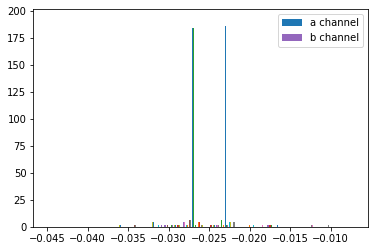

Batch: 0 | Processing time for 500 : 65.41054725646973s | Batch Loss: 1.2220397591590881e-05
1
torch.Size([224, 224, 3])
(224, 224, 2)


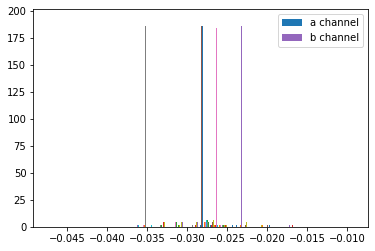

2
Test Loss: 0.00010976505776246388 | Processed in  132.46910786628723s


In [102]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

avg_loss = 0.0
loop_start = time.time()
batch_start = time.time()
batch_loss = 0.0
pred_imgs = []
orig_imgs =[]
break_c =2
for idx,(img_l_encoder, img_ab_encoder, img_l_inception, img_rgb, file_name,og_img) in enumerate(test_dataloader):
        #*** Skip bad data ***
        if break_c==0:
          break
        break_c -=1 
        if not img_l_encoder.ndim:
            continue
        og_img=og_img.squeeze(0)
        orig_imgs.append(og_img)
        #print(og_img.shape)
        
            
        #*** Intialize Model to Eval Mode ***
        model.eval()
        
        #*** Forward Propagation ***
        img_embs = inception_model(img_l_inception.float())
        output_ab = model(img_l_encoder,img_embs)
        
        np_out = output_ab[0].detach().numpy().transpose(1,2,0)
        print(np_out.shape)
        n_bins = 100
        plt.hist(np_out[:,:,0],bins = n_bins,label='a channel')
        plt.hist(np_out[:,:,1],bins = n_bins,label='b channel')
        plt.legend(loc='upper right')
        plt.show()
        
        #*** Adding l channel to ab channels ***
        color_img = concatente_and_colorize(torch.stack([img_l_encoder[:,0,:,:]],dim=1),output_ab)
        color_img_jpg = color_img[0].detach().numpy().transpose(1,2,0)
        pred_imgs.append(color_img_jpg)
        #cv2_imshow(color_img_jpg)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()
        # cv2.imwrite('outputs/'+file_name[0],color_img_jpg*255)
        # save_image(color_img[0],'outputs/'+file_name[0])

        #*** Printing to Tensor Board ***
        grid = torchvision.utils.make_grid(color_img)
        writer.add_image('Output Lab Images', grid, 0)
        
        #*** Loss Calculation ***
        loss = loss_criterion(output_ab, img_ab_encoder.float())
        avg_loss += loss.item()
        batch_loss += loss.item()

        if idx%point_batches==0: 
            batch_end = time.time()   
            print('Batch:',idx, '| Processing time for',point_batches,':',str(batch_end-batch_start)+'s', '| Batch Loss:', batch_loss/point_batches)
            batch_start = time.time()
            batch_loss = 0.0
        
test_loss = avg_loss/len(test_dataloader)
print('Test Loss:',avg_loss/len(test_dataloader),'| Processed in ',str(time.time()-loop_start)+'s')
writer.close()

In [133]:
import numpy as np
from skimage.metrics import peak_signal_noise_ratio  as PSNR
from skimage.metrics import structural_similarity as SSIM
pred_imgs = np.asarray(pred_imgs)
# PSNR
psnr = 0
ssim = [] 
ssim_val =0
for i in range(len(pred_imgs)):
  psnr += PSNR(orig_imgs[i].numpy(),pred_imgs[i])
  temp = SSIM(orig_imgs[i].numpy(),pred_imgs[i],multichannel=True)
  ssim_val += temp
  ssim.append(temp)

psnr_avg = psnr/len(pred_imgs)
ssim_avg = ssim_val/len(pred_imgs)
print(psnr_avg)
print(ssim_avg)




22.15183847551851
0.9002645121042094
0.9253324


In [ ]:
plt.figure(figsize=(20, 6))
for i in range(11):
    # grayscale
    plt.subplot(1, 11, i + 1)
    plt.imshow(pred_imgs[i])
    plt.gray()
    plt.axis('off')
 
''' 
   # recolorization
    plt.subplot(3, 16, i + 1 +16)
    plt.imshow(decoded_imgs[i].reshape(256, 256,3))
    plt.axis('off')
    
    # original
    plt.subplot(3, 16, i + 1 + 32)
    plt.imshow(X_test[i].reshape(256, 256,3))
    plt.axis('off')
'''
plt.tight_layout()
plt.show()